# Input data

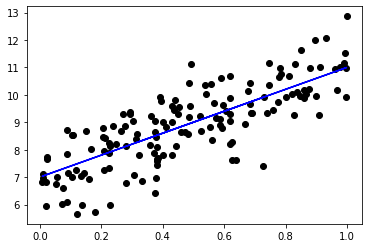

In [48]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.random(150)
y = 4 * x + 7 + np.random.normal(0, 1 , 150)
y_f = 4 * x + 7

plt.scatter(x, y, color='black')
plt.plot(x, y_f, color='blue')
plt.show()

# Output results


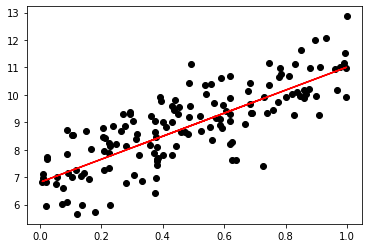

In [49]:
import torch
import torch.nn as nn

x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
p_x = torch.from_numpy(x).float()
p_y = torch.from_numpy(y).float()

epochs = 200

model = nn.Linear(in_features=1, out_features=1, bias=True)
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

#Traning section
losses = []
final_loss= 0
the_ta_0 = []
the_ta_1= []
for epoch in range(epochs): 
     # Create model parameter
    for a, b in enumerate(model.parameters()):
      if b.requires_grad: 
        if a == 0:
          the_ta_0.append(b.data.item())          
        else:
          the_ta_1.append(b.data.item())  

    predict_y = model(p_x)
    # get loss for the predicted output
    loss = criterion(predict_y, p_y)
    
    losses.append(loss.item())
    
    # Clear gradient buffers
    optimizer.zero_grad()

    # get gradients w.r.t to parameters
    loss.backward()
    
    final_loss = loss.item()

    # update parameters
    optimizer.step()

predict_y = model(p_x).float()

#Energy values
plt.scatter(x, y, color='black')
plt.plot(p_x,predict_y.detach(),color='red')
plt.show()

# Energy Values

Text(0.5, 0, 'epochs')

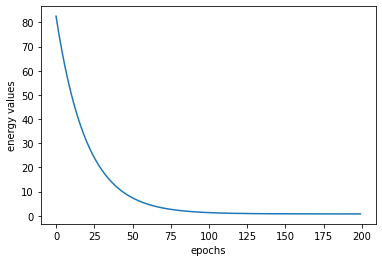

In [52]:
plt.plot(range(epochs), losses) 
plt.ylabel('energy values') 
plt.xlabel('epochs')

# Model Parameter

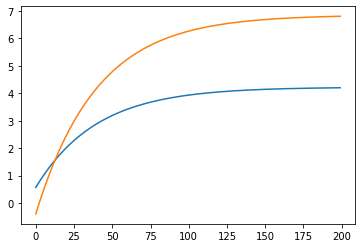

In [53]:
plt.plot(the_ta_0) 
plt.plot(the_ta_1) 
plt.show()